In [1]:
from SpaJava import allocpop
import matplotlib.pyplot as plt
import numpy as np

In [3]:
readme_demo = allocpop.JavaPolygonPrepare()

## Purpose

Polygons:
<img src="https://www.researchgate.net/profile/Eko_Handayanto/publication/282574087/figure/fig1/AS:281199613366272@1444054620028/Location-of-study-Malang-District-of-East-Java-Indonesia.png" alt="drawing" style="width:600px;"/> 
Reality:
<img src="https://data.qz.com/2018/palu/petobo_0817.jpg" alt="drawing" style="width:600px;"/> 

## Polygon Analysis

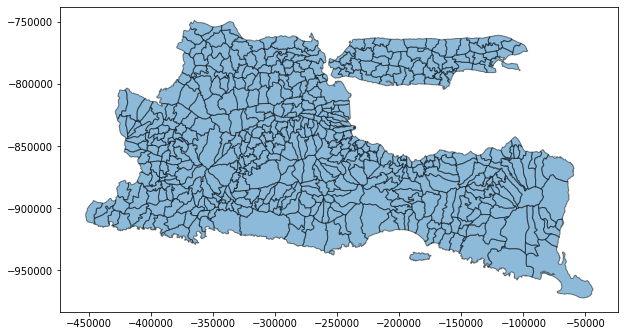

In [4]:
data = readme_demo.shp_read()

In [5]:
data.size

23520

980

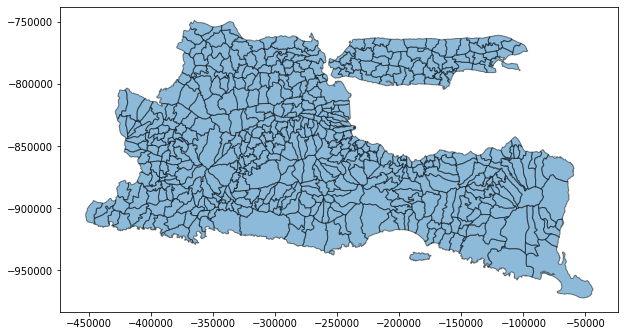

In [5]:
data = readme_demo.data_clean(readme_demo.java_shp, show=True)
data.size

### function 1: intersect 
create intersect of two polygons

In [21]:
intersect_data = readme_demo.intersect()

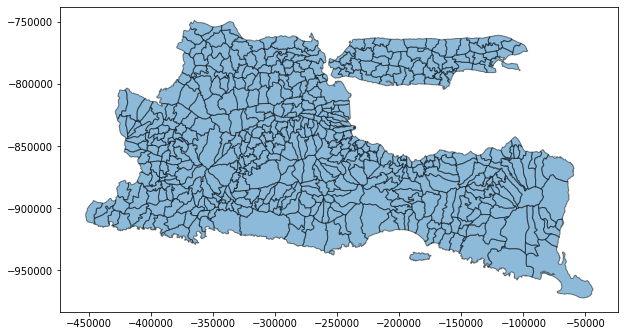

In [17]:
readme_demo.fig_show(intersect_data)

### function 2: convert to raster
problematic

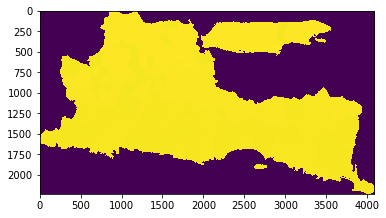

In [22]:
readme_demo.conv_raster()





## Raster Preparation
prepare the raster file that we want 

In [3]:
readme_demo2 = allocpop.JavaRasterPrepare()

.img is the data we want to analysis

In [4]:
img = readme_demo2.img
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

It is not very clean, as the -infinate stand for NaN value, so we could do data cleaning

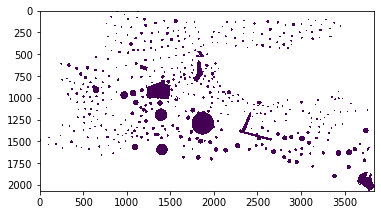

In [6]:
readme_demo2.raster_show(lg=False)

caculate the total value of the whole raster:

In [9]:
total_population = readme_demo2.total_pop()
total_population

21553836.0

### func 1: neo dilation
The following func could dilation the raster without turning it into binary file

In [10]:
img = readme_demo2.neo_dilation(repeat = 60)

In [16]:
img

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521],
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521],
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521]], dtype=float32)

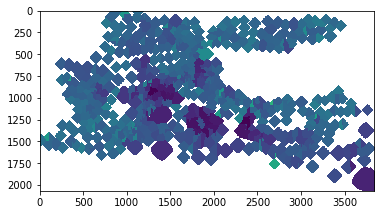

In [18]:
plt.imshow(np.log(img+1))

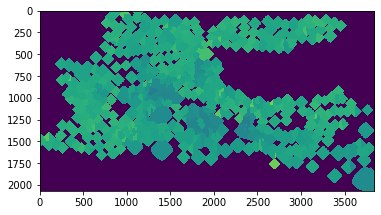

In [20]:
plt.imshow(np.log(readme_demo2.img+1))

In [107]:
img = np.where(np.isnan(img),0,img)

### func 2: block_split
based on this map, creat a binary map divide different blocks

In [23]:
bw = readme_demo2.block_split()

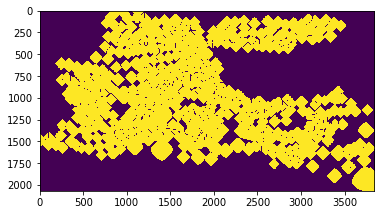

In [24]:
plt.imshow(bw)

### func3: smooth_raster
make the raster more smooth...

In [25]:
smooth_raster = readme_demo2.smoothen_raster(bw)

270174
431209
587176
738026
884338


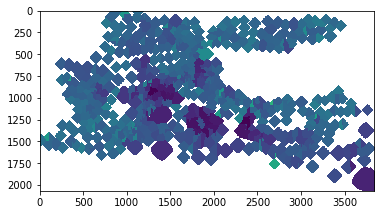

In [26]:
fig = np.log(smooth_raster+1)
plt.imshow(np.where(fig == 0, np.NaN, fig))

### func 4: neo_erosion_raster
generate the analysis unit for our final purposes

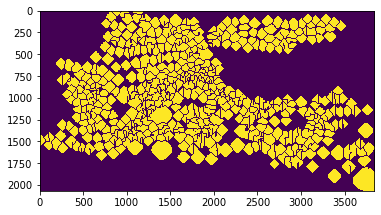

In [29]:
new_bw = readme_demo2.neo_erosion_raster(bw)

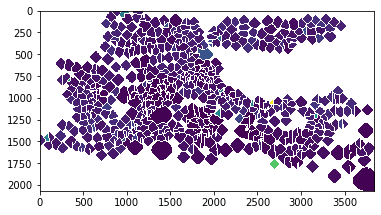

In [34]:
final_non_binary_raster = new_bw*smooth_raster
final_non_binary_raster = np.where(final_non_binary_raster==0,
                                   np.NaN,final_non_binary_raster)
plt.imshow(final_non_binary_raster)

## raster statistical analysis

### function 1: ultra_random

This function could create an non-stationary spaital process for each cell.

In [1]:
from SpaJava import allocpop

In [2]:
a = allocpop.JavaRasterAnalysis()

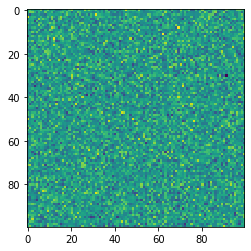

In [3]:
allocpop.raster_show(a.x0_layer, logarithm=False)

In [4]:
a.x0_layer

array([[ -74.57317267,  141.87625625,   30.92841559, ...,  138.03094113,
         -40.32725707,   54.47637626],
       [  20.2927516 ,  -91.03655561,   67.23276159, ...,  -41.30309703,
          60.89060225,   88.89760298],
       [  83.18942166,   13.1776146 ,  171.27796631, ...,  174.17377834,
         -84.75308441,  -55.98470768],
       ...,
       [-238.33959609,  -38.58475813,   -1.1836663 , ...,   47.77526094,
          42.24998345,    3.36023298],
       [  17.40009122, -104.72288811,  -74.99351643, ..., -128.63939759,
        -121.30747666,  -96.99411375],
       [ 125.44443497, -110.93534125,  152.29211375, ..., -163.18512446,
          20.09284624,  227.43015812]])

In [4]:
for _ in range(100):
    a.ultra_random()

The result looks the same, but the disparity between cells exaggarated. 

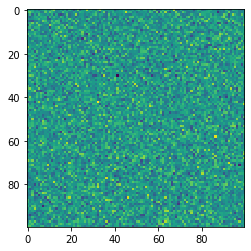

In [5]:
allocpop.raster_show(a.x0_layer, logarithm=False)

### function 2: pattern creation

This function could add some trend or feature to the 2D raster data. It is not very stable now.

In [6]:
a.pattern_creator(1,pattern=1)

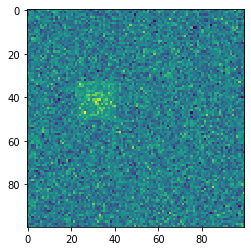

In [7]:
allocpop.raster_show(a.x1_layer, logarithm=False)

In [8]:
a.pattern_creator(3, pattern=4)

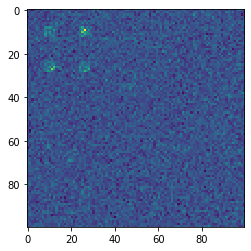

In [9]:
allocpop.raster_show(a.y_layer, logarithm=False)

### function 3: spatial weighted regression

This one simply do regression between Y, x1, x2, but only consider the blocks nearby. Ideally the surface should be smooth.

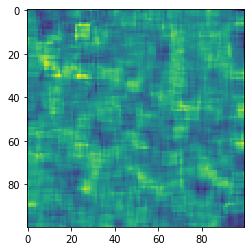

In [20]:
z3 = a.regression_space(radius=3)
allocpop.raster_show(z3[0])

something even smoother (radius = 5,7,10)

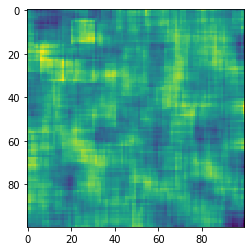

In [21]:
z5 = a.regression_space(radius=5)
allocpop.raster_show(z5[0])

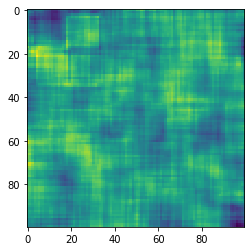

In [22]:
z7 = a.regression_space(radius=7)
allocpop.raster_show(z7[0])

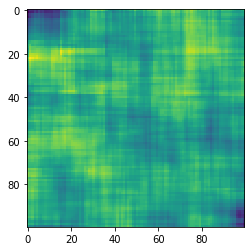

In [23]:
z10 = a.regression_space(radius=10)
allocpop.raster_show(z10[0])

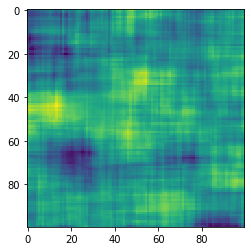

In [26]:
allocpop.raster_show(z10[1])